In [230]:
import numpy as np
import pandas as pd

In [231]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [232]:
df.shape

(5572, 5)

In [233]:
### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Evaluation
### 6. Improvement
### 7. Website

### 1. Data Cleaning

In [234]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [236]:
## Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [237]:
df.sample(5)

,v1,v2
3139,spam,sexy sexy cum and text me im wet and warm and ...
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...
5242,ham,Hmm thinking lor...
4042,ham,I am literally in bed and have been up for lik...
1181,ham,You flippin your shit yet?


In [238]:
## renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."
168,ham,Great escape. I fancy the bridge but needs her...
2542,ham,Aiyo please Ì_ got time meh.
1645,ham,I.ll post her out l8r. In class
4537,ham,Dare i ask... Any luck with sorting out the car?


In [239]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [240]:
df['target']=encoder.fit_transform(df['target'])

In [241]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [242]:
## check for duplicate values
df.duplicated().sum()

403

In [243]:
## remove duplicates
df=df.drop_duplicates(keep='first')

In [244]:
df.duplicated().sum()

0

In [245]:
df.shape

(5169, 2)

### 2.EDA

In [246]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

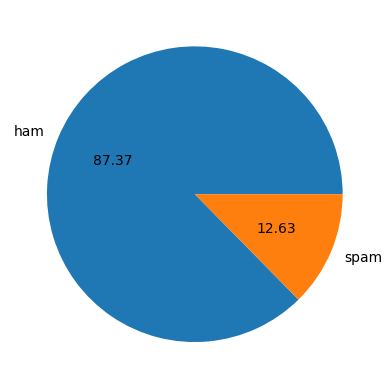

In [247]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [248]:
import nltk

In [249]:
df['num_characters'] = df['text'].apply(len)

In [250]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [251]:
## num of words 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [252]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [253]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [254]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [255]:
df.describe(include='number')

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [256]:
# ham_df=df[df['target']==0]
#ham_df.describe(include='number')
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [257]:
## spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [258]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

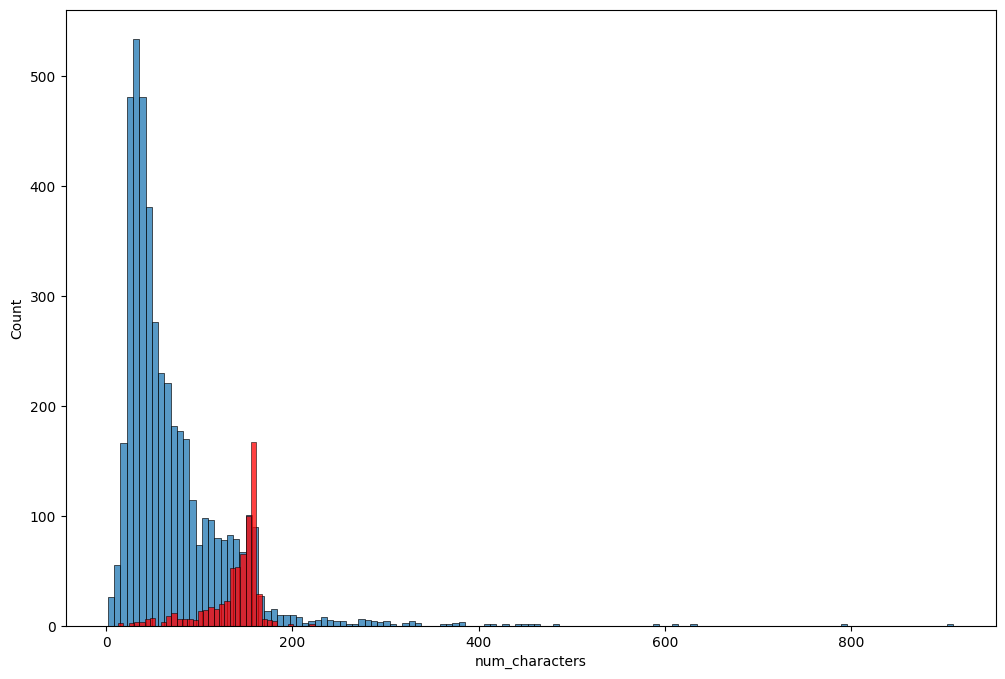

In [259]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

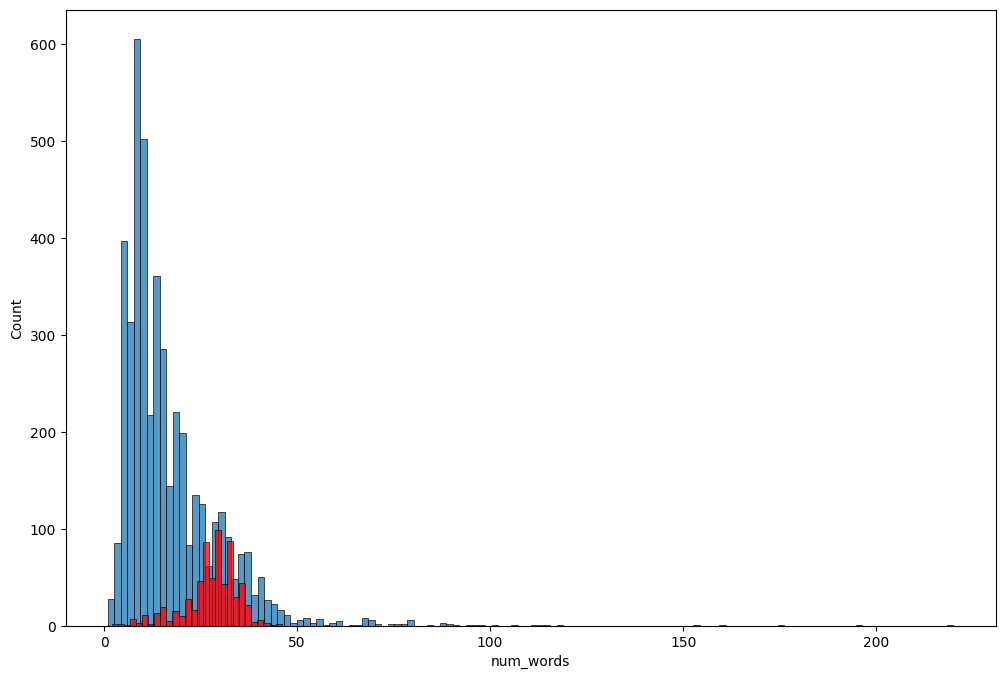

In [260]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


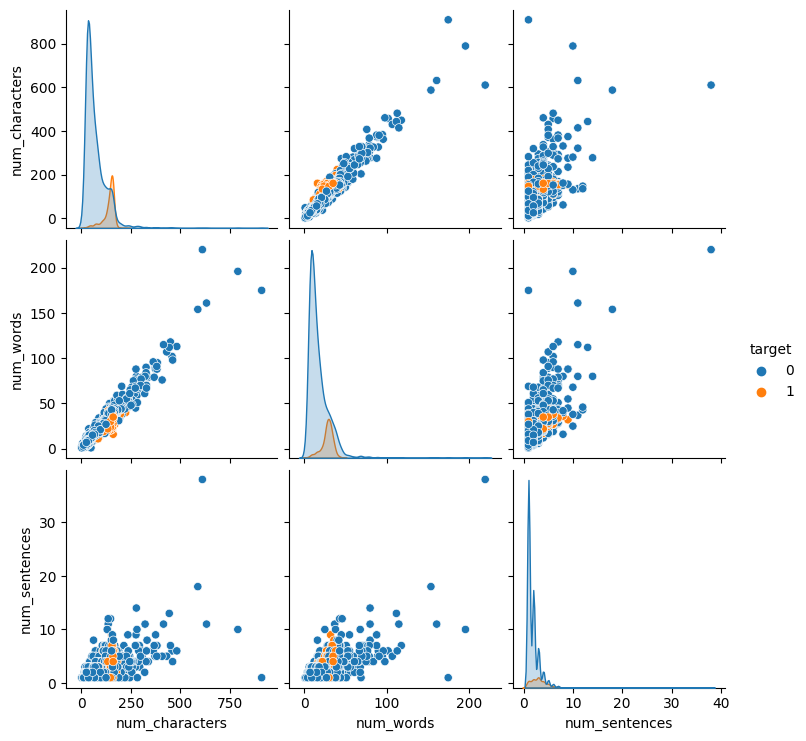

In [261]:
sns.pairplot(df,hue='target')

In [262]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

In [263]:
corr_matrix

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


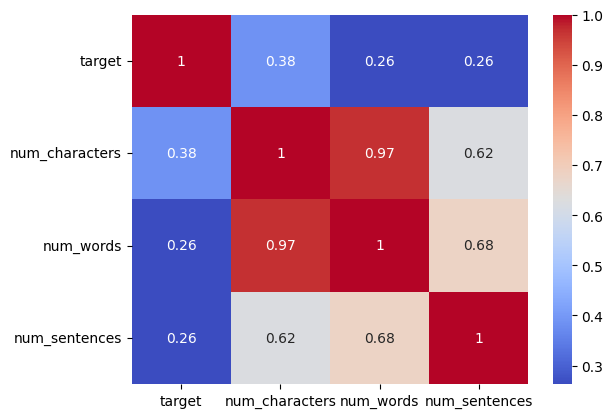

In [264]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special charaacters
* Removing stops words and punctuation
* Stemming

In [265]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [266]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()

    # Remove punctuation, symbols, and special characters, and apply stemming
    cleaned_words = [stemmer.stem(word) for word in words if word.isalnum() or word.isnumeric()]

    # Remove stopwords (English)
    cleaned_words = [word for word in cleaned_words if word.lower() not in stopwords.words('english')]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

In [267]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk thi stuff anymor tonight k cri enough today'

In [268]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [269]:
df['transformed_text']=df['text'].apply(transform_text)

In [270]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail onli bugi n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [271]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [272]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

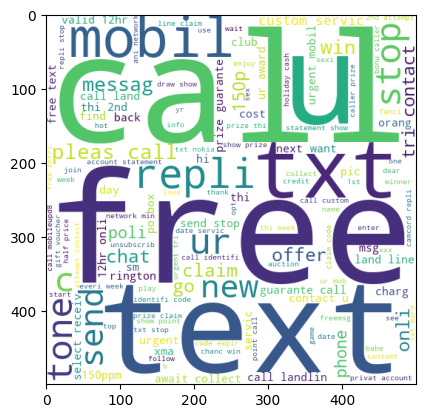

In [273]:
plt.imshow(spam_wc)

In [274]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

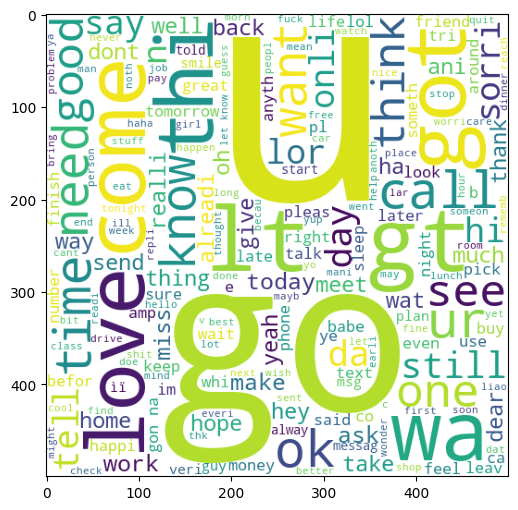

In [275]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

### Top 30 words which has come for spam

In [276]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [277]:
len(spam_corpus)

10161

In [278]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


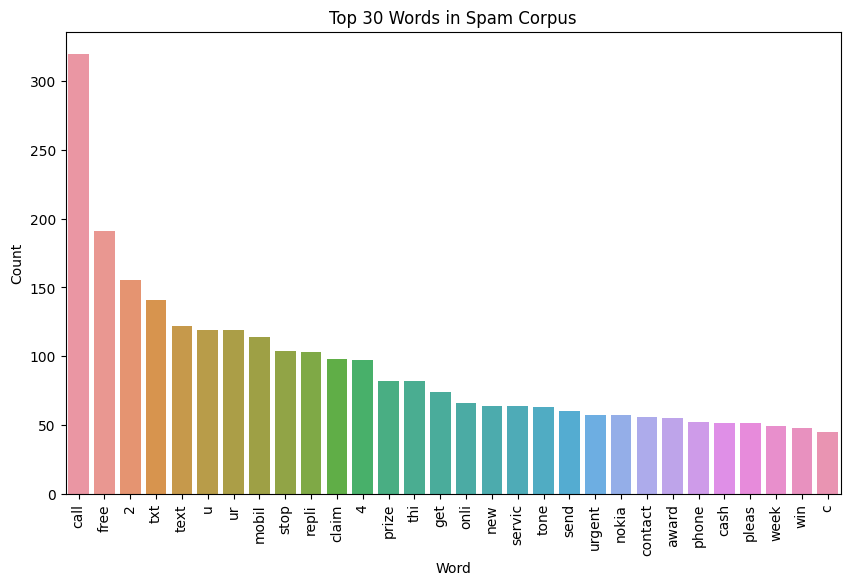

In [279]:
word_count = Counter(spam_corpus).most_common(30)

# Convert the data to a DataFrame
word_df = pd.DataFrame(word_count, columns=["Word", "Count"])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=word_df["Word"], y=word_df["Count"])
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Corpus")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

### Top 30 words which has come for ham

In [280]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [281]:
len(ham_corpus)

36420

In [282]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


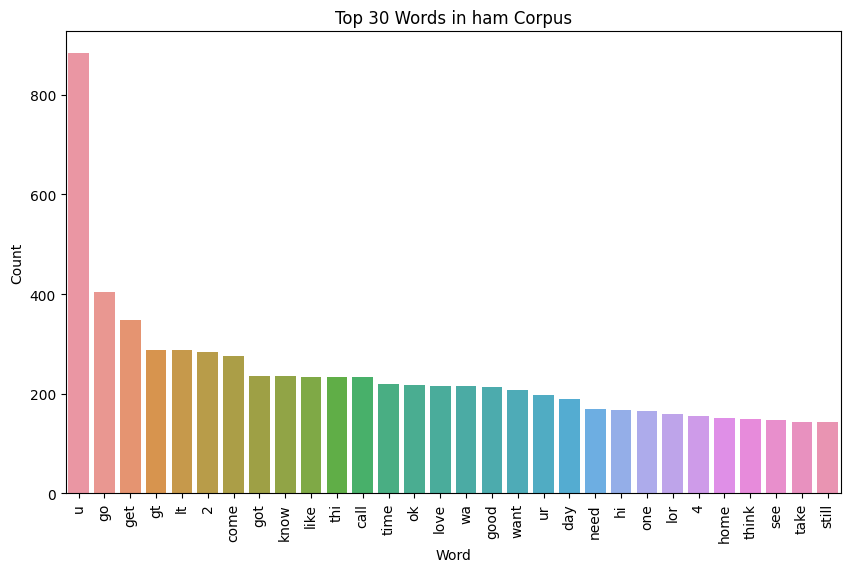

In [283]:
word_count = Counter(ham_corpus).most_common(30)

# Convert the data to a DataFrame
word_df = pd.DataFrame(word_count, columns=["Word", "Count"])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=word_df["Word"], y=word_df["Count"])
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in ham Corpus")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

### 4. Model Building

## first we will use the bag of words

In [284]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [285]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [286]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [287]:
X.shape

(5169, 6693)

In [288]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [289]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [290]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [291]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [292]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [293]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[871  25]
 [ 11 127]]
0.8355263157894737


In [294]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## Now wee will going to use the Tfidf

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [318]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

#### you can perform the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
,scaler = MinMaxScaler,
X = scaler.fit_transform(X)

#### you can add the num_character col to X and we are doing this just for checking if there is improvement or not 
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [319]:
x.shape

(5169, 3000)

In [320]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=2)

In [322]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [323]:
GNB.fit(x_train,Y_train)
y_pred4 = GNB.predict(x_test)
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4))

0.8713733075435203
[[790 106]
 [ 27 111]]
0.511520737327189


In [324]:
MNB.fit(x_train,Y_train)
y_pred5 = MNB.predict(x_test)
print(accuracy_score(Y_test,y_pred5))
print(confusion_matrix(Y_test,y_pred5))
print(precision_score(Y_test,y_pred5))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [325]:
BNB.fit(x_train,Y_train)
y_pred6 = BNB.predict(x_test)
print(accuracy_score(Y_test,y_pred6))
print(confusion_matrix(Y_test,y_pred6))
print(precision_score(Y_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### tfidf --> MNB

## Now we are going to use different ml algorithms 

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [330]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb_01 = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators = 50,random_state=2)

In [331]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB': mnb_01,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC':etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [332]:
def train_classifier(clf,x_train,Y_train,x_test,Y_test):
    clf.fit(x_train,Y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [334]:
train_classifier(svc,x_train,Y_train,x_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [335]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,Y_train,x_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8349514563106796
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9619047619047619
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8549618320610687
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785


In [336]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [337]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.972921,1.000000
5,RF,0.977756,0.983193
0,SVC,0.975822,0.974790
8,ETC,0.975822,0.974790
6,AdaBoost,0.960348,0.961905
4,LR,0.956480,0.951456
10,xgb,0.970019,0.942149
9,GBDT,0.948743,0.929293
7,BgC,0.956480,0.854962


In [338]:
performance_df1 = pd.melt(performance_df,id_vars= "Algorithm")

In [339]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.972921
2,RF,Accuracy,0.977756
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.975822
5,AdaBoost,Accuracy,0.960348
6,LR,Accuracy,0.956480
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.956480


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


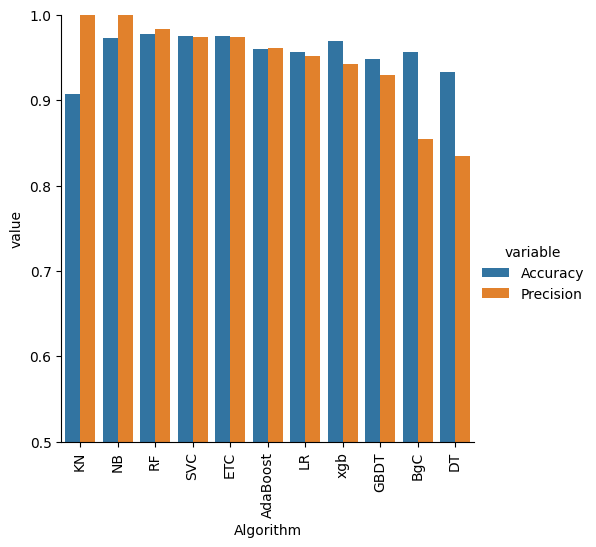

In [340]:
sns.catplot(x='Algorithm',y='value',
hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [341]:
import pickle
pickle.dump(tfidf,open('vectorizer_01.pkl','wb'))
pickle.dump(MNB,open('model_01.pkl','wb'))